<h1 align="center">Kaggle Decal #18</h1>
<h2 align="center"> Introduction to <a href="https://keras.io/">Keras</a></h2>


In [4]:
!pip install matplotlib

    100% |████████████████████████████████| 12.8MB 89kB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 3.4MB/s ta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for subprocess32 ... - \ | / done
  Stored in directory: /Users/philkuz/Library/Caches/pip/wheels/7d/4c/a4/ce9ceb463dae01f4b95e670abd9afc8d65a45f38012f8030cc
Successfully built subprocess32


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import utils
import numpy as np
import matplotlib.pyplot as plt

## Load the data

In [21]:
num_classes = 10
X, labels = utils.load_mnist_dataset()
Y = utils.one_hot(labels, num_classes)

In [22]:
# split testing and training set
X_train, Y_train, X_test, Y_test = utils.train_test_split(X, Y, test_size=0.2)


## Initialize the model and Setup the layers

In [23]:
model = Sequential()
model.add(Dense(output_dim=800, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

/Users/philkuz/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=800, input_dim=784)`
  from ipykernel import kernelapp as app
/Users/philkuz/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`


## Compile and set Optimization

In [24]:
# sgd = SGD(momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Train the model

In [25]:
model.fit(X_train, Y_train, nb_epoch=5, batch_size=128)

Epoch 1/5
33600/33600 [==============================] - 3s - loss: 0.8000 - acc: 0.7887      

## Evaluate the accuracy of the model

In [11]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print("\nLoss {}, Accuracy {}".format(*loss_and_metrics))

8160/8400 [============================>.] - ETA: 0s
Loss 0.275660016948, Accuracy 0.9225


## Make new predictions with the model

In [12]:
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)

7808/8400 [==========================>...] - ETA: 0s

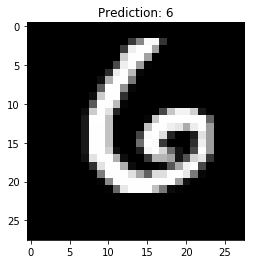

In [13]:
index=3
utils.plot_mnist(X_test[index], title='Prediction: {}'.format(classes[index]))


Now you may be wondering what examples caused the network to fail. And for a lot of them, you could expect to get them wrong as well!

In [ ]:
start = 19
for i in range(start, len(X_test)):
    actual = np.argmax(Y_test[i])
    predicted = classes[i]
    if predicted != actual:
        print("Model misclassified a {} as a {} at index {}".format(actual, predicted, i))
        utils.plot_mnist(X_test[i])
        break

## Let's Get some Convolution up in here
However, we'll need to get our data in a form that is friendly with convolutions. 

Let's keep using the MNIST dataset as a quick test. Each row in our dataset is a 784 length vector that represents the digit. Why don't we make this into a 28x28 matrix instead

In [14]:
# reload in case we want to do this part separately
X_flat, labels = utils.load_mnist_dataset()
Y = utils.one_hot(labels)

In [15]:
X = X_flat.reshape((len(X_flat),28, 28,1))
X_train, Y_train, X_test, Y_test = utils.train_test_split(X, Y, test_size=0.2)

In [16]:
nb_filters=32
kernel_size = (3,3)
input_shape = (28, 28, 1)
pool_size = (2, 2)
nb_classes = 10

In [17]:
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

/Users/philkuz/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
/Users/philkuz/.virtualenvs/keras/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2))`


In [ ]:
model.fit(X_train, Y_train, nb_epoch=12, batch_size=128, validation_data=(X_test, Y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
33600/33600 [==============================] - 63s - loss: 2.3476 - acc: 0.6809 - val_loss: 0.2746 - val_acc: 0.9218

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print("\nLoss {}, Accuracy {}".format(*loss_and_metrics))